In [111]:
import requests as req
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import csv
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [19]:
DAILY_DATA = 'https://api.covidtracking.com/v1/states/current.csv'
HIST_DATA = 'https://api.covidtracking.com/v1/states/daily.csv'

cur_df =pd.read_csv(DAILY_DATA)
cur_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886,NaN,NaN,NaN,totalTestsViral,1731628,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818,69092.0,2480716.0,NaN,totalTestsViral,2736442,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0,NaN,2140.0,NaN,totalTestsViral,2140,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454,56519.0,3073010.0,NaN,totalTestsViral,7908105,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [4]:
hist_df = pd.read_csv(HIST_DATA)
hist_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


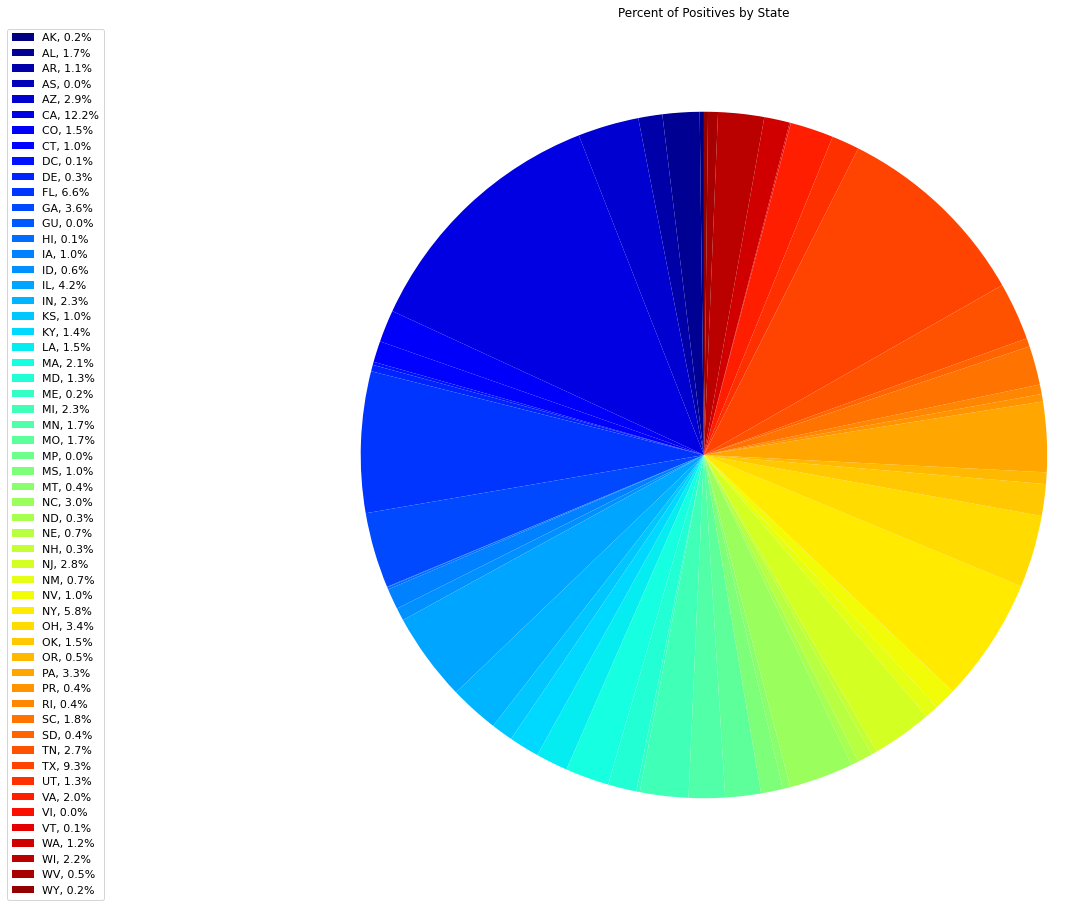

In [14]:
labels = np.array(cur_df['state'])
sizes = np.array(cur_df['positive'])
fig1, ax1 = plt.subplots(figsize=(15, 12))
fig1.subplots_adjust(0.3,0,1,1)
theme = plt.get_cmap('jet')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
_, _ = ax1.pie(sizes, startangle=90)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title("Percent of Positives by State")
plt.show()
#ax.set_xticklabels(texas['date'])

Text(0.5, 1.0, 'Total Positives by State')

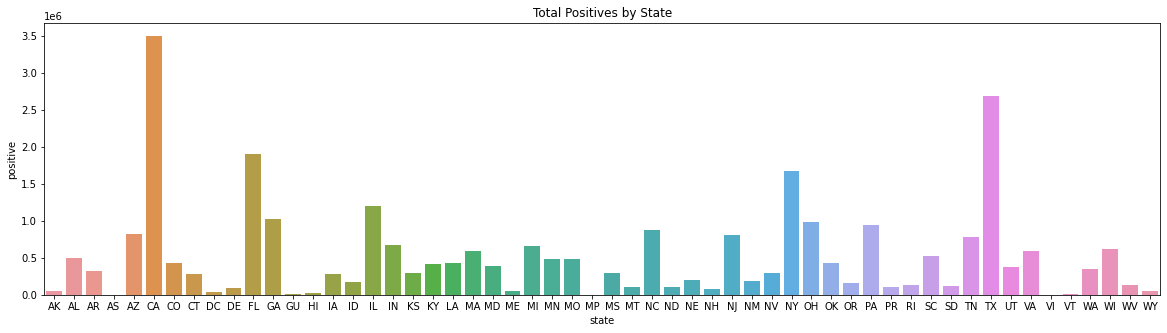

In [6]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='state',y='positive',hue='state', data= cur_df,dodge=False)
plt.legend([],[], frameon=False)
plt.title("Total Positives by State")

Text(0.5, 1.0, 'Total Tests by State')

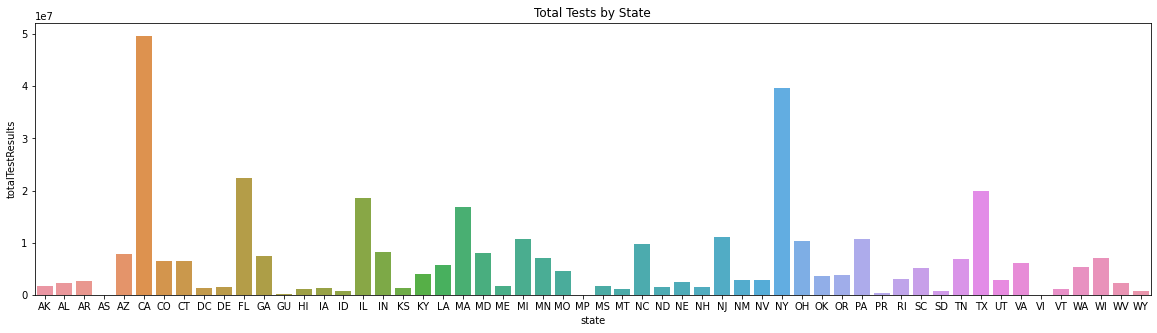

In [72]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='state',y='totalTestResults',hue='state', data=cur_df,dodge=False)
plt.legend([],[], frameon=False)
plt.title("Total Tests by State")

In [126]:
cali = hist_df[hist_df['state'] == 'CA']
dates = cali['date'].to_numpy()
dates = dates.astype(str)
cali_deaths = cali['death'].to_numpy()
print(len(dates))
print(len(cali_deaths))

369
369


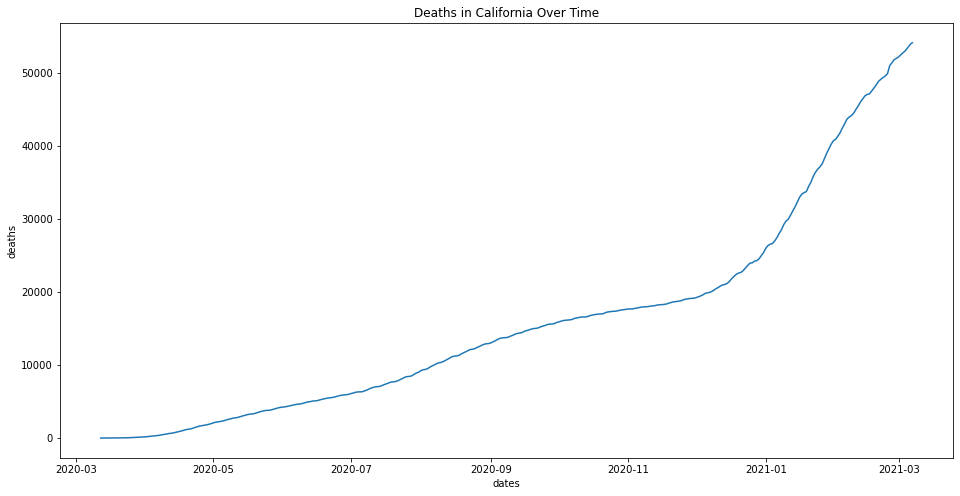

In [127]:
d = pd.DataFrame()
d['dates'] = dates
for i in range(len(dates)):
    dates[i] = datetime.strptime(dates[i], '%Y%m%d').strftime('%m/%d/%Y')
d['dates'] = pd.to_datetime(d['dates'])
d['deaths'] = cali_deaths
d.head()
plt.figure(figsize=(16,8))
plt.title('Deaths in California Over Time')
ax = sns.lineplot(x='dates', y='deaths', data=d)